##### import library

In [1]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Deep learning (PyTorch and TensorFlow)
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Plotly for interactive visualization
import plotly.graph_objects as go

# Custom utility module
import utility


2025-03-05 17:26:29.898851: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 17:26:29.951712: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-05 17:26:29.951765: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-05 17:26:29.953257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-05 17:26:29.961607: I tensorflow/core/platform/cpu_feature_guar

##### Define functions

In [2]:
# Define the parabolic loss function with local minima
def parabolic_loss_with_dips(t):
    """
    Generate a parabolic loss function with five local minima at specific points.
    
    Parameters:
    t : numpy array
        Input array representing the variable.
    
    Returns:
    numpy array
        Loss function with local minima.
    """

    # t = t[0]
    # Base parabolic function
    base_parabola = (t / 10) ** 2
    
    # Add small dips at specified local minima
    dips = (
        0.1 * np.exp(-50 * (t - 9) ** 2) +
        0.1 * np.exp(-50 * (t - 8) ** 2) +
        0.1 * np.exp(-50 * (t - 7) ** 2) +
        0.1 * np.exp(-50 * (t - 6) ** 2) +
        0.1 * np.exp(-50 * (t - 5) ** 2) +
        0.1 * np.exp(-50 * (t - 4) ** 2) +

        0.1 * np.exp(-50 * (t + 9) ** 2) +
        0.1 * np.exp(-50 * (t + 8) ** 2) +
        0.1 * np.exp(-50 * (t + 7) ** 2) +
        0.1 * np.exp(-50 * (t + 6) ** 2) +
        0.1 * np.exp(-50 * (t + 5) ** 2) +
        0.1 * np.exp(-50 * (t + 4) ** 2) 

    )
    
    return base_parabola - dips

f = parabolic_loss_with_dips

In [3]:

def parabolic_loss_with_dips_torch(t):
    """
    Generate a parabolic loss function with multiple local minima using PyTorch.
    
    Parameters:
    t : torch.Tensor
        Input tensor representing the variable.
    
    Returns:
    torch.Tensor
        Loss function with local minima.
    """
    # Base parabolic function
    base_parabola = (t / 10) ** 2
    
    # Define dips using Gaussian functions
    dips = (
        0.1 * torch.exp(-50 * (t - 9) ** 2) +
        0.1 * torch.exp(-50 * (t - 8) ** 2) +
        0.1 * torch.exp(-50 * (t - 7) ** 2) +
        0.1 * torch.exp(-50 * (t - 6) ** 2) +
        0.1 * torch.exp(-50 * (t - 5) ** 2) +
        0.1 * torch.exp(-50 * (t - 4) ** 2) +
        0.1 * torch.exp(-50 * (t + 9) ** 2) +
        0.1 * torch.exp(-50 * (t + 8) ** 2) +
        0.1 * torch.exp(-50 * (t + 7) ** 2) +
        0.1 * torch.exp(-50 * (t + 6) ** 2) +
        0.1 * torch.exp(-50 * (t + 5) ** 2) +
        0.1 * torch.exp(-50 * (t + 4) ** 2)
    )
    
    return base_parabola - dips

##### Provide parameter value

In [4]:
interval = 1000
max_iters = 1000
min_grid = -10
max_grid = 10
x = np.linspace(min_grid, max_grid, interval)
z = np.vectorize(f)(x)

##### Plot the function

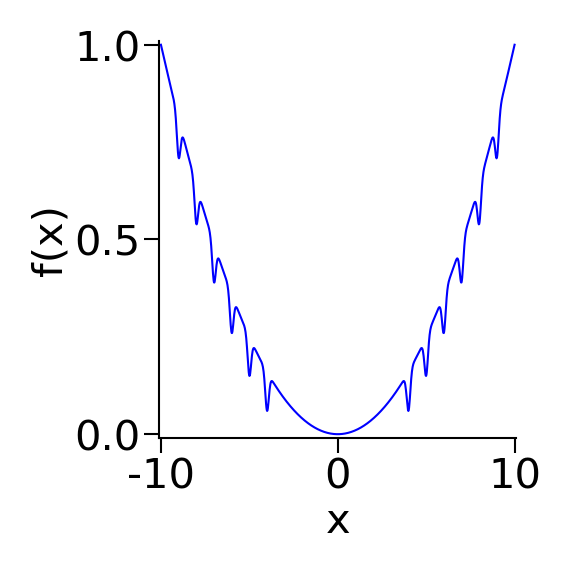

In [79]:
fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (2, 2))
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)

ax.plot(x, z, label='Custom Function', color='b', lw = 0.5)
ax.set_ylabel("f(x)", labelpad=1)
ax.set_xlabel("x", labelpad=1)
ax.set_xlim(-10.1, 10.1)
# ax.set_title("Piecewise Function with Discontinuities", fontsize=10)
ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)

plt.tight_layout()

# ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 9)
plt.savefig("sample2.pdf", dpi = 300, transparent=False, bbox_inches="tight")
# plt.savefig("sample2.pdf", dpi = 300)

##### Initialize class object and grid

In [6]:
obj = utility.CentralDifference()

In [7]:
args = [-0.16210637]

grad = obj.compute_gradient(args = args, f = f)
print("Gradient:", grad)

Gradient: [-0.00324213]


##### Show a dummy example

In [8]:
num_samples=1000
dimension=1
batch_size=512
epochs = 1000

##### Generate synthetic data to model the gradient of function

In [9]:
X_train, X_test, y_train, y_test = obj.generate_random_data(f=f, num_samples=num_samples, dimension=dimension, value_range=(min_grid,max_grid))


##### Define model architecture

In [13]:
model = Sequential([
    Dense(16, input_shape=(dimension,), activation='leaky_relu'),
    Dense(8, activation='leaky_relu'),
    # Dense(8, activation='leaky_relu'),
    Dense(dimension)
])

model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

epochs = 200

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/200
2/2 [==============================] - 1s 167ms/step - loss: 0.9677 - val_loss: 0.8510
Epoch 2/200
2/2 [==============================] - 0s 53ms/step - loss: 0.8338 - val_loss: 0.7378
Epoch 3/200
2/2 [==============================] - 0s 52ms/step - loss: 0.7239 - val_loss: 0.6467
Epoch 4/200
2/2 [==============================] - 0s 43ms/step - loss: 0.6390 - val_loss: 0.5751
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.5744 - val_loss: 0.5190
Epoch 6/200
2/2 [==============================] - 0s 49ms/step - loss: 0.5238 - val_loss: 0.4732
Epoch 7/200
2/2 [==============================] - 0s 33ms/step - loss: 0.4847 - val_loss: 0.4329
Epoch 8/200
2/2 [==============================] - 0s 49ms/step - loss: 0.4491 - val_loss: 0.3950
Epoch 9/200
2/2 [==============================] - 0s 44ms/step - loss: 0.4141 - val_loss: 0.3583
Epoch 10/200
2/2 [==============================] - 0s 47ms/step - loss: 0.3788 - val_loss: 0.3228
Epoch 11/200
2/2 [

##### Define loss curve

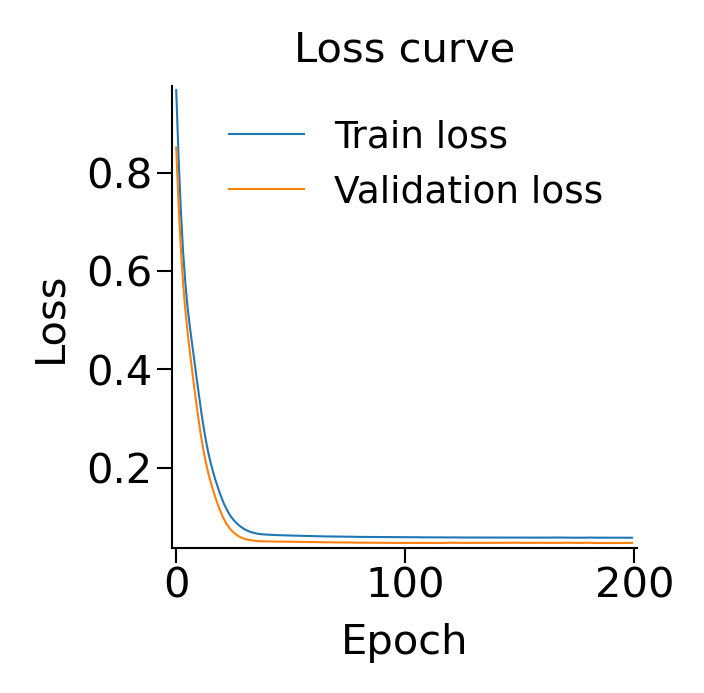

In [68]:
ax = obj.plot_convergence(history)
# ax = utility.custom_figure_axis(ax, fontsize=5)
ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 9)
ax.legend(ncol = 1, fontsize = 9, frameon=False)
ax.set_title("Loss curve", fontsize = 10)
plt.savefig("loss2.pdf", dpi = 300, transparent=False, bbox_inches="tight")
# plt.savefig("loss2.pdf", dpi = 300)

##### Test data performance

In [20]:
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

1/7 [===>..........................] - ETA: 0s - loss: 0.0658

7/7 [==============================] - 0s 2ms/step - loss: 0.0535
Test loss: 0.053534574806690216


##### Define torch optimizer

In [21]:
import torch

def torch_optimization(args, lr, num_steps, f):
    x = torch.tensor(args[0], requires_grad=True)  # Track gradients
    # print(x)

    optimizer = torch.optim.Adam([x], lr=lr)  # Use an optimizer
    for step in range(num_steps):
        optimizer.zero_grad()
        loss = f(x)
        loss.backward()
        optimizer.step()

        # if step % 200 == 0:
        #     print(f"Step {step}: x = {x.item()},f(x, y) = {loss.item()}")

    
    return np.array([x.item()])


In [19]:
import numpy as np

def extract_first_valid(arr):
    """Extracts the first index [0] value if it's not None and not NaN. 
    If arr is a float, it directly checks and returns it."""
    
    if isinstance(arr, (float, int)):  # If it's a single number
        return arr if not np.isnan(arr) else None
    
    if arr and arr[0] is not None and not np.isnan(arr[0]):  # If it's an iterable
        return arr[0]
    
    return None  # Return None if invalid

##### Run 10000 iteration to optimize funtion from [-10,10] with step size of 1 with various method

In [40]:
max_iters = 10000
c = 0

lr = 0.001
dct = dict()
import pandas as pd
df = pd.DataFrame(columns =["X_start",  "y_start", "X_gd", "y_gd", "X_new", "y_new", "X_autograd", "y_autograd"])

for i in list(np.arange(-10, 11, 1)):

    print(f"currently running for x = {i}")
    # i = -5.5
    # for j in list(range(-5, 6, 1)):

    # print(i)

    x0 = np.array([i*1.0])
    x_gd, X_new, y_gd, y_new, current_score_new, current_score_gd = obj.optimize_function(f=f, model = model, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-5)
    df.loc[c, ["X_gd", "X_new", "y_gd", "y_new"]] = extract_first_valid(x_gd), extract_first_valid(X_new), extract_first_valid(y_gd), extract_first_valid(y_new)
    df.loc[c, "y_start"] = f(x0)
    df.loc[c, "X_start"] = x0
    # print(x0)


    x_torch = torch_optimization(args=x0, lr = lr, num_steps=max_iters, f=parabolic_loss_with_dips_torch)

    df.loc[c, "X_autograd"] = x_torch
    df.loc[c, "y_autograd"] = f(x_torch)

    # print(f"currently running for x = {i}")

    c = c + 1

    dct[i] = dict()


    dct[i] =   {"x_gd" : x_gd, "X_new": X_new, "y_gd": y_gd, "current_score_new": current_score_new, "current_score_gd":current_score_gd, "X_autograd":x_torch, "y_autograd": f(x_torch)}


    x0, x_gd, X_new, y_gd, y_new, current_score_new, current_score_gd, x_torch = [None] * 8

        # break
    # break







currently running for x = -10
currently running for x = -9
currently running for x = -8
currently running for x = -7
currently running for x = -6
currently running for x = -5
currently running for x = -4
currently running for x = -3
currently running for x = -2
currently running for x = -1
currently running for x = 0
currently running for x = 1
currently running for x = 2
currently running for x = 3
currently running for x = 4
currently running for x = 5
currently running for x = 6
currently running for x = 7
currently running for x = 8
currently running for x = 9
currently running for x = 10


#### pickle result

In [82]:
res = {"model": model, "history": history, "result": df, "dct": dct}
import pickle
# Save (pickle) the dictionary to a file
with open("pickle2.pkl", "wb") as file:
    pickle.dump(res, file)

##### Test if pickled model is working

In [84]:
# Load (unpickle) the dictionary from the file
with open("pickle2.pkl", "rb") as file:
    loaded_data = pickle.load(file)

loaded_model1 = loaded_data["model"]
# test_loss = loaded_model.evaluate(X_test, y_test)
print("Test loss:", loaded_model1.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.0535
Test loss: 0.053534574806690216


In [42]:
df["y_autograd"] = df["y_autograd"].apply(pd.to_numeric, errors='coerce')
df["X_start"] = df["X_start"].astype(str)

In [86]:
# import importlib
# importlib.reload(utility)

##### Density plot of optimized y (left) and optimized y with various method with various starting point (right)

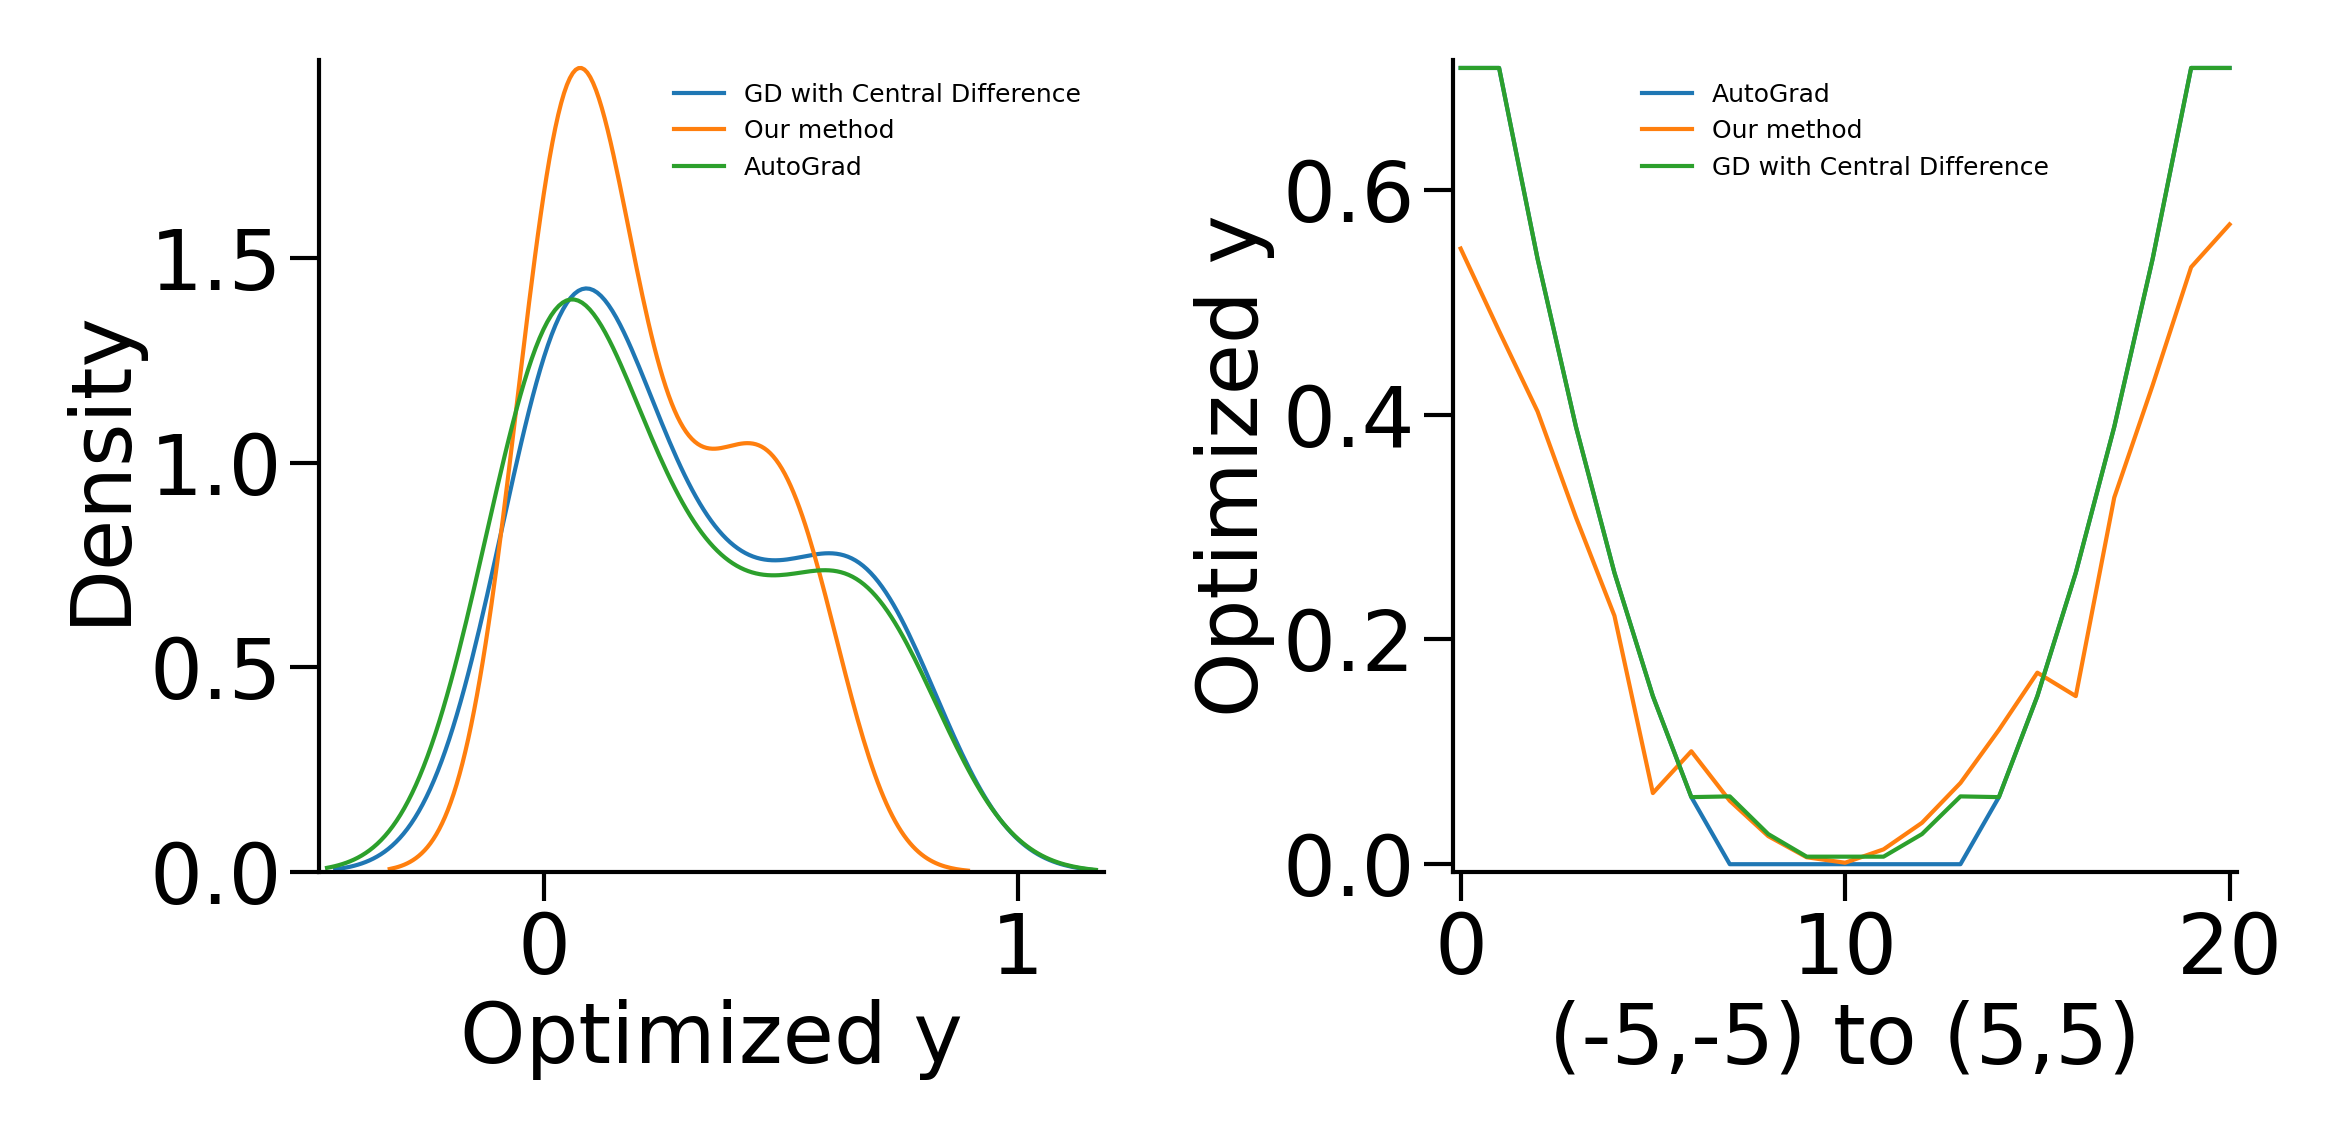

In [ ]:
fig, ax = plt.subplots(1, 2, dpi = 600, figsize = (4,2))
fig.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.02)
import seaborn as sns
ax[0] = sns.kdeplot(data = df, x = "y_gd", ax=ax[0], label = "GD with Central Difference", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_new", ax=ax[0], label = "Our method", lw = 0.5)
ax[0] = sns.kdeplot(data = df, x = "y_autograd", ax=ax[0], label = "AutoGrad", lw = 0.5)
ax[0].legend(ncol = 1, fontsize=3, frameon=False)

ax[0].set_xlabel("Optimized y", labelpad=1)
ax[0].set_ylabel("Density", labelpad=1)

# ax[0] = utility.custom_figure_axis(ax[0], rotation=0, fontsize=5)
ax[0] = utility.custom_figure_axis(ax[0], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)



ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_autograd", ax=ax[1], label = "AutoGrad", lw = 0.5)
ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_new", ax=ax[1], label = "Our method", lw = 0.5)
ax[1] = sns.lineplot(data = df, x = range(df.shape[0]), y = "y_gd", ax=ax[1], label = "GD with Central Difference", lw = 0.5)

ax[1].legend(ncol = 1, fontsize=3, frameon=False)
ax[1].set_ylabel("Optimized y", labelpad=1)
ax[1].set_xlabel("(-5,-5) to (5,5)", labelpad=1)
# ax[1] = utility.custom_figure_axis(ax[1], rotation=0, fontsize=5)
ax[1] = utility.custom_figure_axis(ax[1], show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 3)


# ax[0].set_title("Density plot of optimized y with different starting point", fontsize=5)
# ax[1].set_title("Point wise optimized y with different method", fontsize=5)

plt.tight_layout()

# plt.savefig("tt2_multi.pdf", dpi = 300)
# plt.savefig("tt2_multi.pdf", dpi = 300, transparent=False, bbox_inches="tight")

In [45]:
# df.to_csv("tt2d.csv", index=False)